# Introduction to Array Based Sequences

The term "array sequence" is general. Python has three main sequences classes:
- List: [1,2,3]
- Tuple: (1,2,3)
- String: '123'

All of these support indexing. 

# Low Level Arrays

In this lecture, we are going to go over how computers store information
- Focus on computer memory
- Memory address
- Units of memory (bits and bytes)
- Memory retrieval

## Low-Level Computer Architecture
Memory of a computer stored in bits. Typical unit is byte, which is 8 bits. Computers typicall use a memory address. Each byte associated with a unique address. 

Computer hardware is designed, in theory, so that any byte of the main memory can be efficiently accessed. Computer's main memory performs as **random access memory (RAM)**. Jut as easy to retrieve byte #8675309 as it is to retrieve byte #309. Individual byte of memory can be stored or retrieved in O(1) time. 

Programming language keeps track of the association between an idenitifer and the memory address. May want a video game to keep track of the top ten scores for that game. Perfer to use a single name for the group. Use index numbers to refer to the high scores in that group. 

A group of related variables can be stpred one after another in a contiguous portion of the computer's memory. We will denote such a representation as an array. A text string is stored as an ordered sequence of individual characters. Python internally represents each Unicode characeter with 16 bits (2 bytes). See the example with the string SAMPLE - which would take up 12 **consecutive** bytes of memory. 

In [1]:
from IPython.display import Image

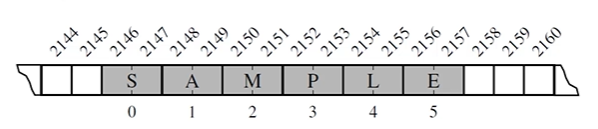

In [2]:
Image(filename='memory_storage.png')

This is an array of *six **characters***. Each location within an array is a ***cell***. Interger ***index*** to describe its location. 

Each cell of an array uses the same number of bytes. This allows any cell to be accessed in constant time. Appropriate memory address can be computed using the calculation: **start + (cell size) x (index)**

That is low-level thinking and we usually won't be concerned with those bits and bytes. We will mostly be concered with a higher level abstraction. 

## Referential Arrays

Imagine 100 student names with ID numbers. Each cell of the array needs to have the same number of bytes. How can we avoid having a series of names? We can use an array of object **References**. 

Each element is a reference to the object. 

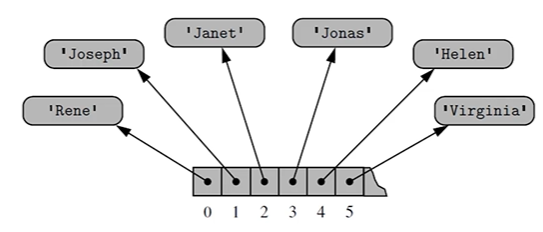

In [3]:
Image(filename='referential_array_example.png')

A single list instance may include multiple references to the same object as elements of the list. Single object can be an element of two or more lists. When computing the slice of a list, the result is a new list instance. New list has references to the same elements that are in the oringal list. 

When computing the slice of a list, the result is a new list intance. New list has reference to the same elements that are in te orginal list. For example:

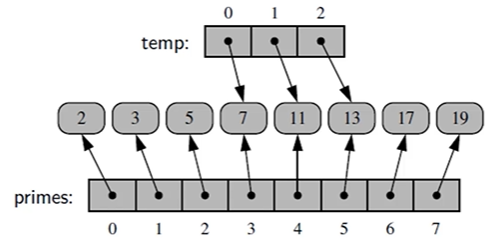

In [4]:
Image(filename='referential_array_slicing_example.png')

On the bottom we have a list called primes. Notice that each of the indexes (0 through 7) is referencing some prime integer. We then take some new list (temp) which is a slice of the prime list, is refernceing the same elements or objects. So we are not creating anything new... we are referencing the same objects. 

What happens if we do some sort of reassignment? In this case, when the elements of the list are immutable objects and since integers are immutable, the fact that the two lists share elements isn't really significant as neither list can cause a change to the shared object. 

For example, if we said temp[2] = 15, what we are actually doing is just chaning the existing reference. So we don't actually change the object 13 to a 15, we just reassigned where that cell is pointing to to another object. 

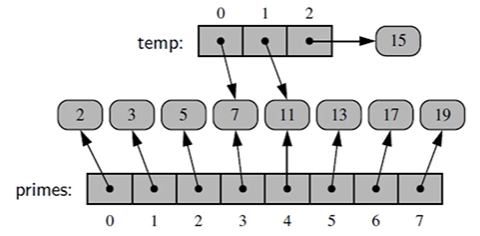

In [5]:
Image(filename='referential_array_new_assign_example.png')

## Copying Arrays

**backup = list(primes)**

This produces a new list that is a ***shallow copy*** in that it refernces the same elements as in the first list. If the contents of the list were of a mutable type, a ***deep copy***, meaning a new list with *new* elements, can be produced by using the deepycopy function from the copy module. 

Let's look at an extreme example. 

Say we create a list of eight zeros. 

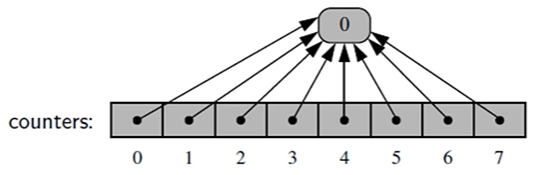

In [6]:
Image(filename='copying_arrays_example.png')

Here we have eight cell references to the same object. At first glance, this might be alarming, but that reference object is immutable.  So even if we do something like counters[2] += 1, we are not chaning the object - we are only changing what counters[2] is pointing at. 

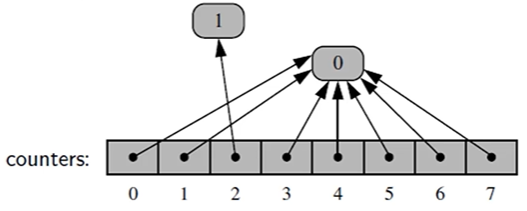

In [7]:
Image(filename='copying_arrays_example_2.png')

Last point to make:

The extend command is used to add all elements from one list to the end of another. But the extended list does not receive copies of those elements. Instead, it is receiving the references to those elements. 

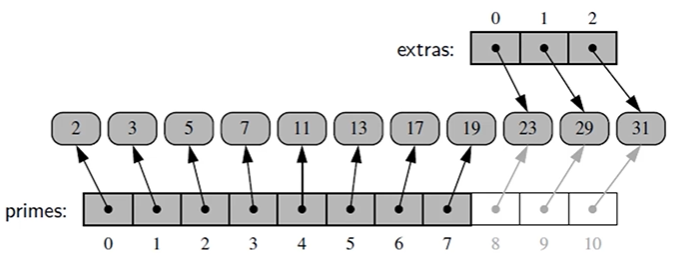

In [8]:
Image(filename='referential_array_extend_example.png')

# Dynamic Arrays

When creating an array in Python, you don't need to specify how large that array is going to be beforehand. And you can just keep adding to this. How does Python do this?

A list instance often has greater capacity than current length. If elements keep getting appended, eventually this extra space runs out.

Let's look at an example.

In [9]:
import sys

# Set n
n = 10

data = []

for i in range(n):
    # Number of elements
    a = len(data)
    
    # Actual size in Bytes
    b = sys.getsizeof(data)
    
    print('Length: {0:3d}; Size in bytes: {1:4d}'.format(a,b))
    
    # Increase length by one
    data.append(n)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192


Notice that as we increase the size of our array, the actual size of it in memory increase, but it happens in chunks so it doesn't have to constantly do it. 

Let's talk about and then code how to implement a dynamic array (Python does list optimally with it's list, so we will use that in the future). 

## Dynamic Array Implementation

The key is to provide means to grow the array ***A*** that stores the elements of a list. We cannot actually grow that array, its capacity is fixed. If an element is appended to a list at a time when the underlying array is full, we will need to perform the following steps: 
- Allocate a new array *B* with larger capacity
- Set **B[i] = A[i]** for **i=0,...,n-1** where **n** denotes current number of items. 
- Set ***A = B***, that is, we henceforth use ***B*** as the array supporting the list. 
- Insert the new elemet in the new array. 

Let's see an illustration of this process:

- (a) create new array **B**
- (b) store elements of **A** in **B**
- (c) reassign reference **A** to **B**

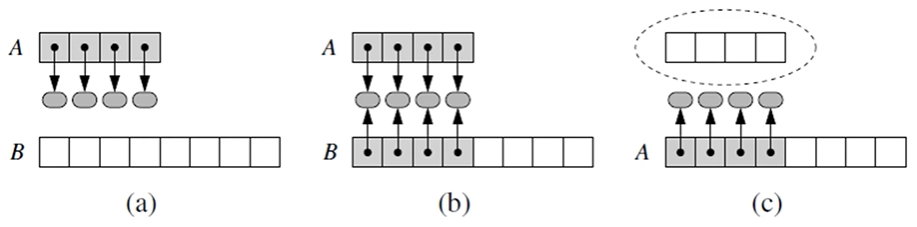

In [10]:
Image(filename='dynamic_array_implementation.png')

How large of a new array to create? A commonly used rule is for the new array to have twice the capacity of the existing array that had been filled. We will see the mathematical reasoning behing this later. 